In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
Suicide = pd.read_csv("suiciderates.csv")
Suicide.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [5]:
Suicide.tail()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
1416,Venezuela (Bolivarian Republic of),2009,751.0,73.6,166.0,9,7.59,10,0.1,25.448414,25646139.0,0.754,14.0
1417,Venezuela (Bolivarian Republic of),2010,775.0,73.7,158.0,9,7.22,10,0.1,25.448414,26078766.0,0.754,14.0
1418,Venezuela (Bolivarian Republic of),2011,760.0,73.8,158.0,9,6.74,10,0.1,25.448414,26503892.0,0.756,14.1
1419,Venezuela (Bolivarian Republic of),2012,731.0,73.7,161.0,9,6.70,10,0.1,25.448414,26926228.0,0.767,14.1
1420,Venezuela (Bolivarian Republic of),2013,618.0,73.8,159.0,9,6.71,10,0.1,25.448414,27345912.0,0.770,14.2


In [6]:
Suicide.drop_duplicates(inplace=True)

In [7]:
Suicide.shape

(1421, 13)

In [8]:
Suicide.isna().sum()

Country                            0
Year                               0
Suicides number                    0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Under-five deaths                  0
HIV/AIDS                           0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1421 non-null   object 
 1   Year                             1421 non-null   int64  
 2   Suicides number                  1421 non-null   float64
 3   Life expectancy                  1421 non-null   float64
 4   Adult Mortality                  1421 non-null   float64
 5   Infant deaths                    1421 non-null   int64  
 6   Alcohol                          1421 non-null   float64
 7   Under-five deaths                1421 non-null   int64  
 8   HIV/AIDS                         1421 non-null   float64
 9   GDP                              1421 non-null   float64
 10  Population                       1421 non-null   float64
 11  Income composition of resources  1421 non-null   float64
 12  Schooling           

In [10]:
Suicide["Suicides number"] = Suicide["Suicides number"].astype(int)
Suicide["Suicides number"].dtype

dtype('int64')

In [11]:
Suicide["Adult Mortality"] = Suicide["Adult Mortality"].astype(int)
Suicide["Adult Mortality"].dtype

dtype('int64')

In [12]:
Suicide["Country"].nunique()

106

In [13]:
Suicide["Year"].nunique()

16

In [14]:
Suicide["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2012, 2013, 2014, 2015, 2011])

In [15]:
Top_10_Countries = Suicide.groupby("Country")["Suicides number"].sum().sort_values(ascending=False).reset_index()
Top_10_Countries = Top_10_Countries.head(10)

In [16]:
Top_10_Countries

,Country,Suicides number
0,Russian Federation,649026
1,United States of America,575514
2,Japan,460105
3,Republic of Korea,194847
4,Germany,164279
5,Ukraine,156200
6,France,154742
7,Brazil,144389
8,Poland,95232
9,Mexico,75542


Text(0.5, 1.0, 'Top 10 Countries by Total Suicides(2000 - 2011)')

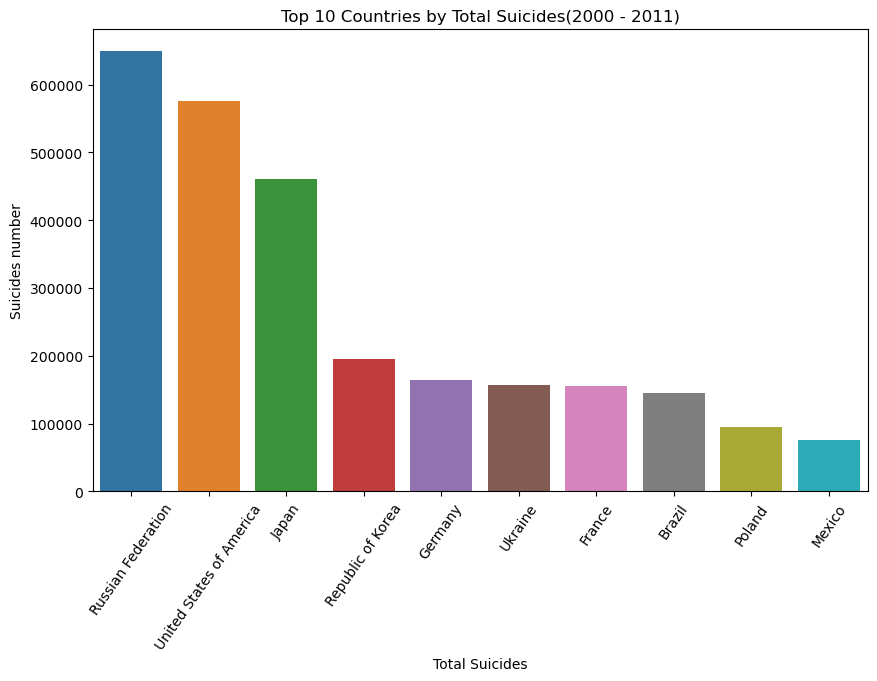

In [17]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(x="Country", y="Suicides number", data=Top_10_Countries)
plt.xlabel("Country")
plt.xlabel("Total Suicides")
plt.xticks(rotation=55)
plt.title("Top 10 Countries by Total Suicides(2000 - 2011)")


In [18]:
Average_5_countries = Suicide.groupby("Country")["Suicides number"].mean().sort_values(ascending=False).reset_index()
Average_5_countries = Average_5_countries.head(5)
Average_5_countries

,Country,Suicides number
0,Russian Federation,40564.125000
1,United States of America,35969.625000
2,Japan,28756.562500
3,Republic of Korea,12177.937500
4,Ukraine,10413.333333


Text(0.5, 1.0, 'Average Suicide Per Country (TOP 5)')

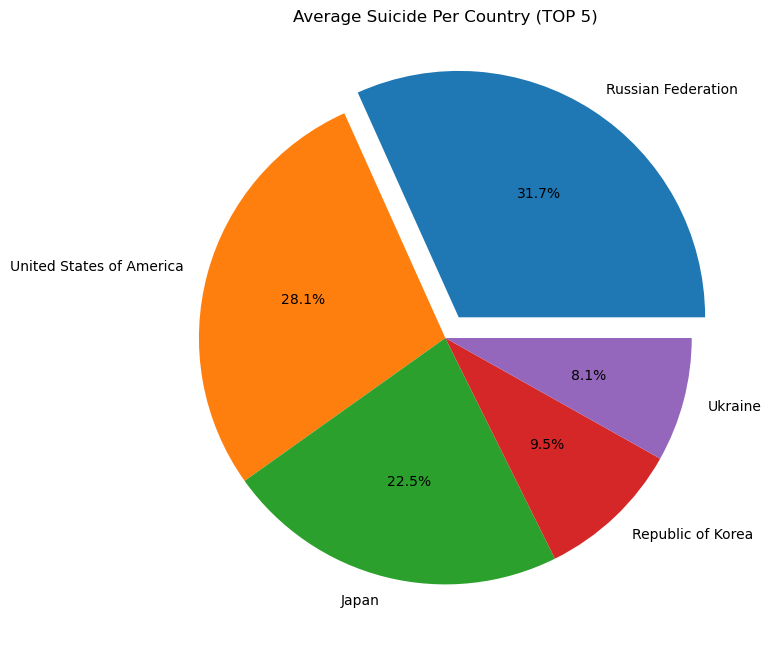

In [19]:
plt.figure(figsize=(8,8))
plt.pie(Average_5_countries["Suicides number"], labels=Average_5_countries["Country"], autopct="%1.1f%%", explode = [0.1, 0, 0,0,0])
plt.title("Average Suicide Per Country (TOP 5)")

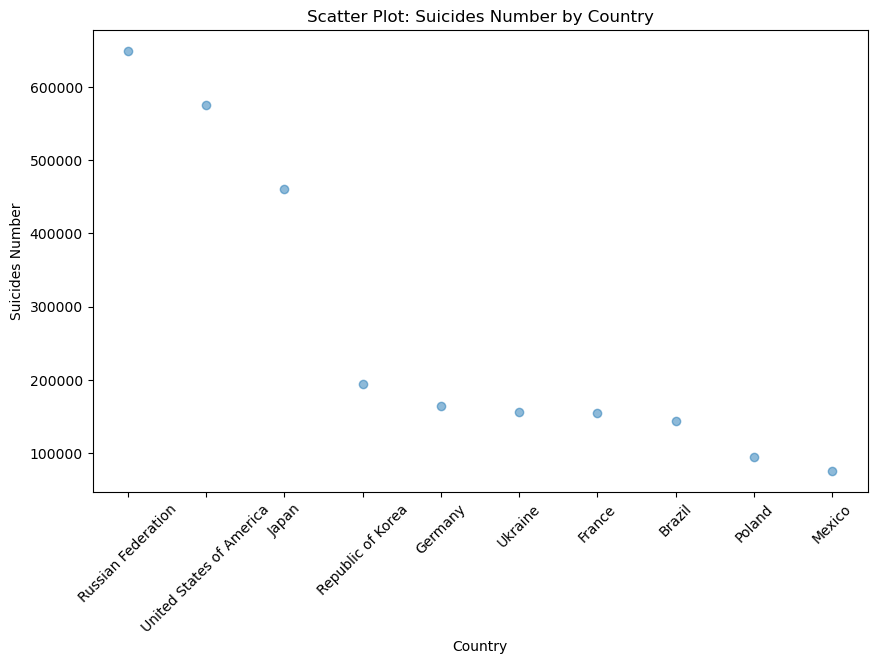

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(Top_10_Countries['Country'], Top_10_Countries['Suicides number'], alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Suicides Number')
plt.title('Scatter Plot: Suicides Number by Country')
plt.xticks(rotation=45)
plt.show()

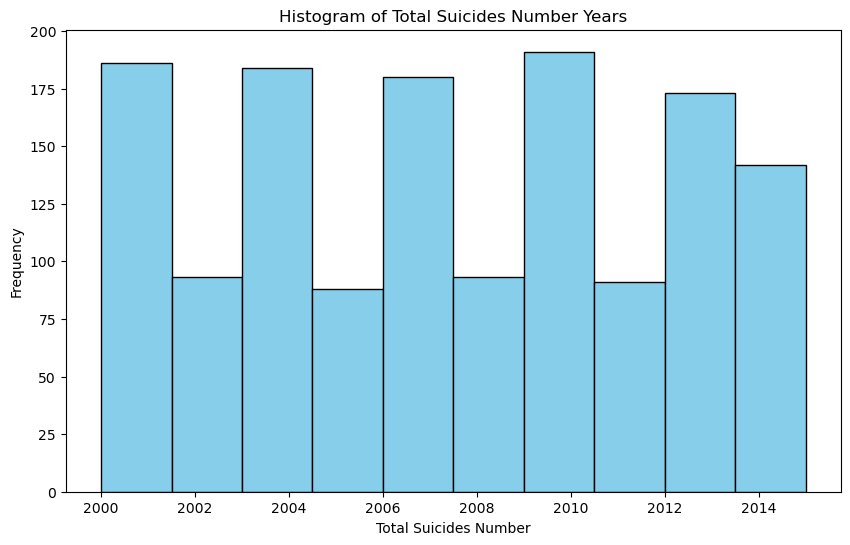

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(Suicide['Year'],  bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Total Suicides Number')
plt.ylabel('Frequency')
plt.title('Histogram of Total Suicides Number Years')
plt.show()

In [22]:
Top_10_Countries = Suicide.groupby("Year")["Suicides number"].sum().sort_values(ascending=False).reset_index()
Top_10_Countries = Top_10_Countries.head(10)
Top_10_Countries

,Year,Suicides number
0,2002,253100
1,2003,253002
2,2000,252510
3,2001,247669
4,2009,239829
5,2004,237551
6,2010,234925
7,2011,232583
8,2008,232160
9,2005,231220


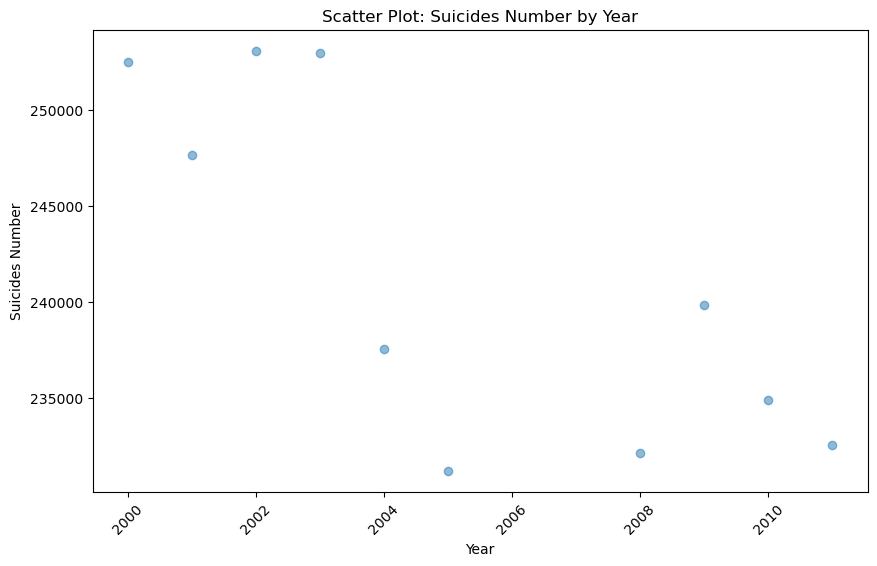

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(Top_10_Countries['Year'], Top_10_Countries['Suicides number'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Scatter Plot: Suicides Number by Year')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Top 10 Years by Total Suicides(2000 - 2011)')

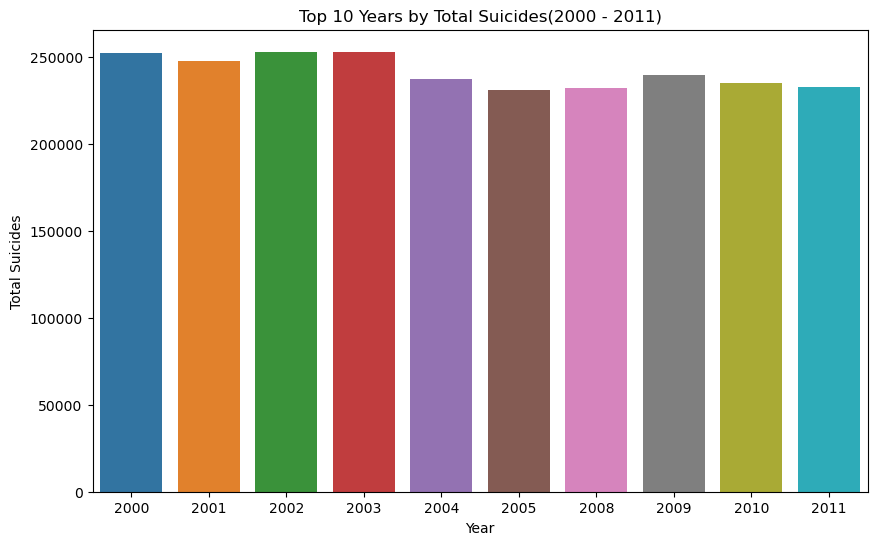

In [24]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Year', y='Suicides number', data=Top_10_Countries)
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Top 10 Years by Total Suicides(2000 - 2011)')

In [25]:
avg_5_years = Suicide.groupby('Year')['Suicides number'].mean().sort_values(ascending=False).reset_index()
avg_5_years = avg_5_years.head(5)
avg_5_years

,Year,Suicides number
0,2015,3193.370968
1,2000,2774.835165
2,2002,2721.505376
3,2014,2721.250000
4,2003,2720.451613


Text(0.5, 1.0, 'Average Suicides per Year (Top 5)')

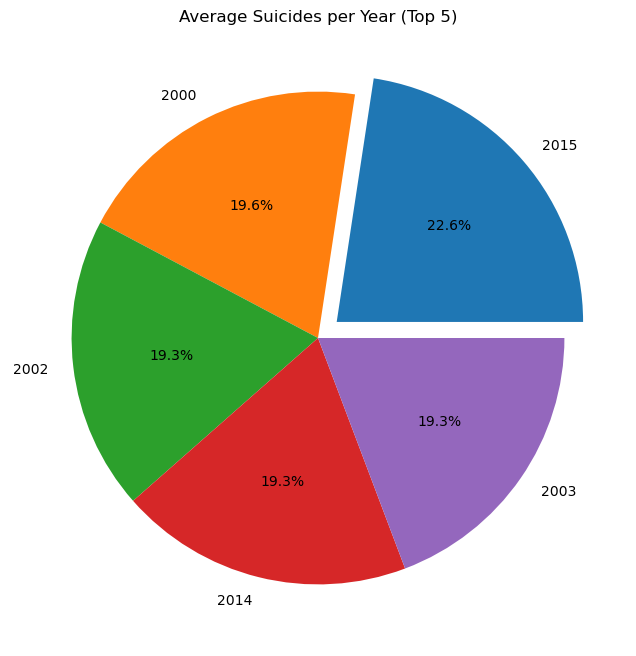

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(avg_5_years['Suicides number'], labels=avg_5_years['Year'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average Suicides per Year (Top 5)')

In [28]:
country_per_year = Suicide.groupby(['Country','Year'])['Suicides number'].sum().sort_values(ascending=False).reset_index()
country_per_year = country_per_year.head(10)
country_per_year

,Country,Year,Suicides number
0,Russian Federation,2001,56958
1,Russian Federation,2000,56619
2,Russian Federation,2002,55024
3,Russian Federation,2003,51445
4,Russian Federation,2004,49096
5,Russian Federation,2005,45802
6,United States of America,2015,44189
7,United States of America,2014,42769
8,Russian Federation,2006,42614
9,Russian Federation,2007,41149


Text(0.5, 1.0, 'Total Suicides per Country in one Year (Top 10)')

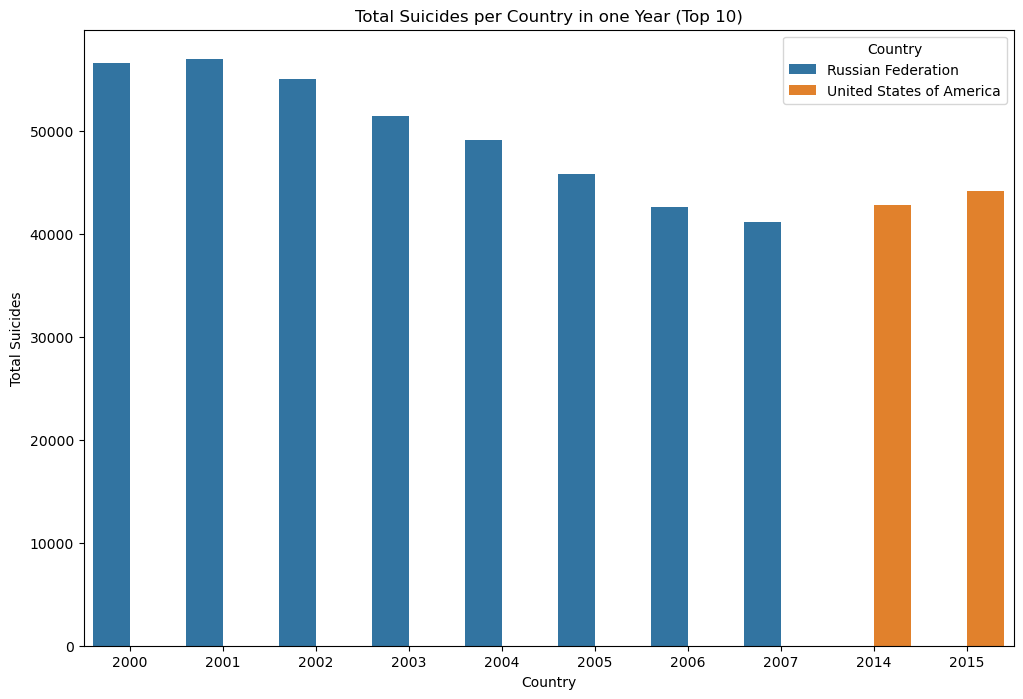

In [29]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Year', y='Suicides number', hue='Country', data=country_per_year)
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.title('Total Suicides per Country in one Year (Top 10)')

In [31]:
Suicide.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54,72.6,11,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119,73.6,14,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133,73.3,15,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124,72.8,18,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146,73.0,17,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [32]:
avg_adult_death = Suicide.groupby('Country')['Adult Mortality'].mean().sort_values(ascending=False).reset_index()
avg_adult_death = avg_adult_death.head(5)
avg_adult_death

,Country,Adult Mortality
0,South Africa,412.7500
1,Kazakhstan,232.0625
2,Russian Federation,224.5625
3,Kiribati,220.5000
4,Philippines,218.5000


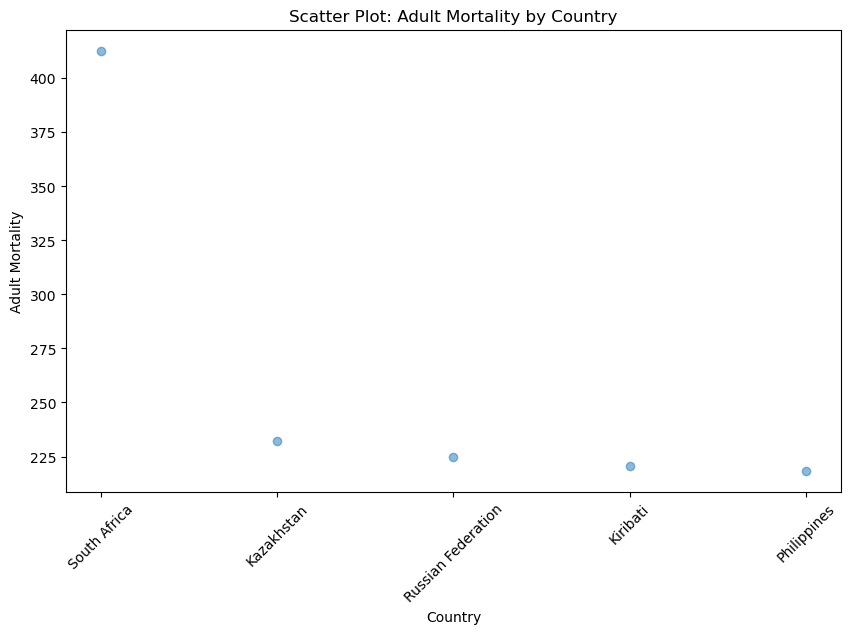

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_adult_death['Country'], avg_adult_death['Adult Mortality'], alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Adult Mortality')
plt.title('Scatter Plot: Adult Mortality by Country')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average Adult deaths top 5 Countries (per 1000)')

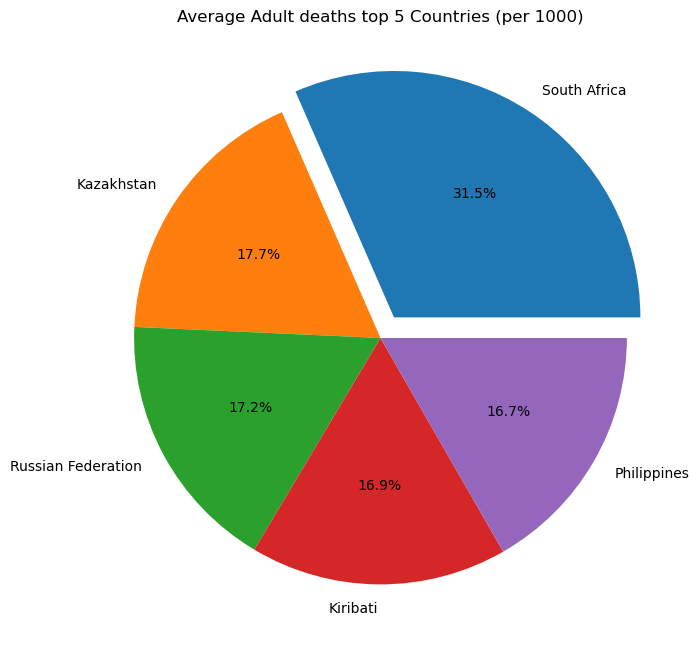

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(avg_adult_death['Adult Mortality'], labels=avg_adult_death['Country'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average Adult deaths top 5 Countries (per 1000)')

In [36]:
avg_adult_death_per_year = Suicide.groupby('Year')['Adult Mortality'].mean().sort_values(ascending=False).reset_index()
avg_adult_death_per_year = avg_adult_death_per_year.head(5)
avg_adult_death_per_year

,Year,Adult Mortality
0,2000,132.021978
1,2005,128.011364
2,2002,127.645161
3,2001,126.494737
4,2004,124.384615


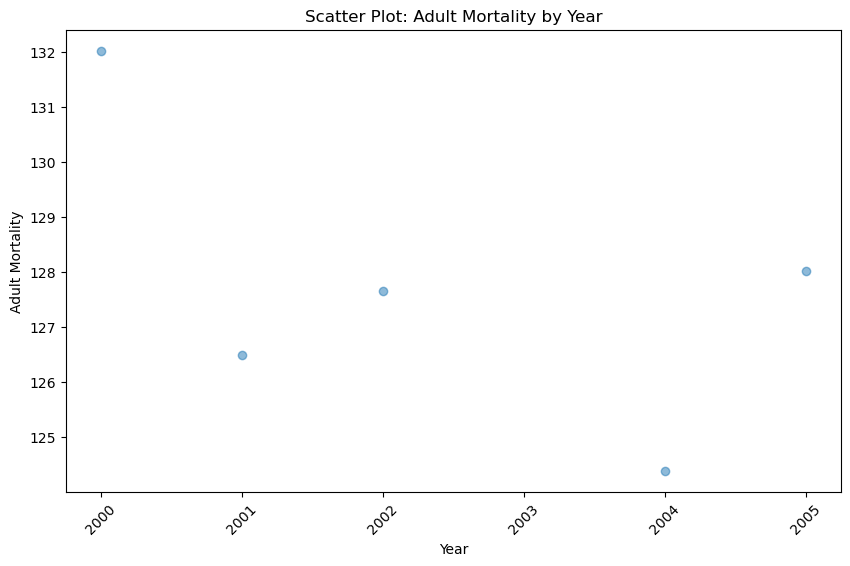

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_adult_death_per_year['Year'], avg_adult_death_per_year['Adult Mortality'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.title('Scatter Plot: Adult Mortality by Year')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average Adult deaths top 5 Countries (per 1000)')

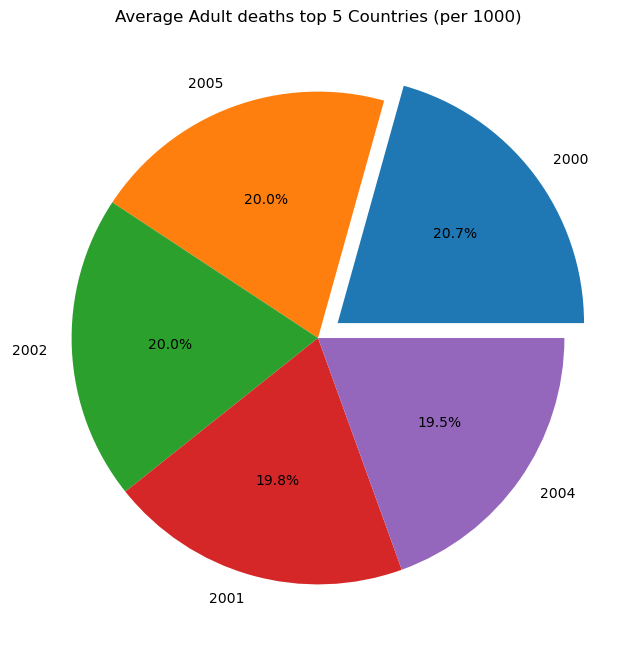

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(avg_adult_death_per_year['Adult Mortality'], labels=avg_adult_death_per_year['Year'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average Adult deaths top 5 Countries (per 1000)')

In [40]:
avg_life_expectancy = Suicide.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).reset_index()
avg_life_expectancy = avg_life_expectancy.head(5)
avg_life_expectancy

,Country,Life expectancy
0,Japan,82.537500
1,Sweden,82.518750
2,Iceland,82.443750
3,Switzerland,82.331250
4,France,82.206667


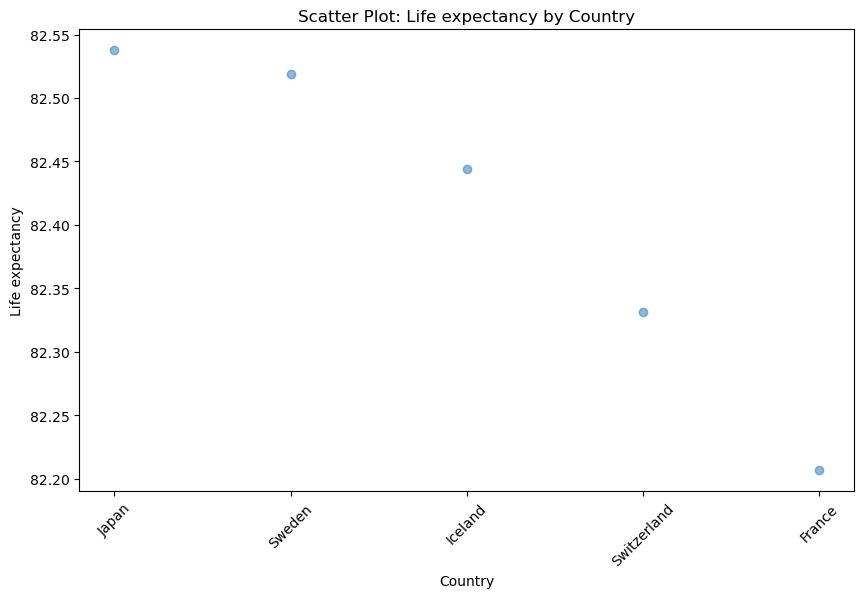

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_life_expectancy['Country'], avg_life_expectancy['Life expectancy'], alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Life expectancy')
plt.title('Scatter Plot: Life expectancy by Country')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average life expectancy (top 5 Countries)')

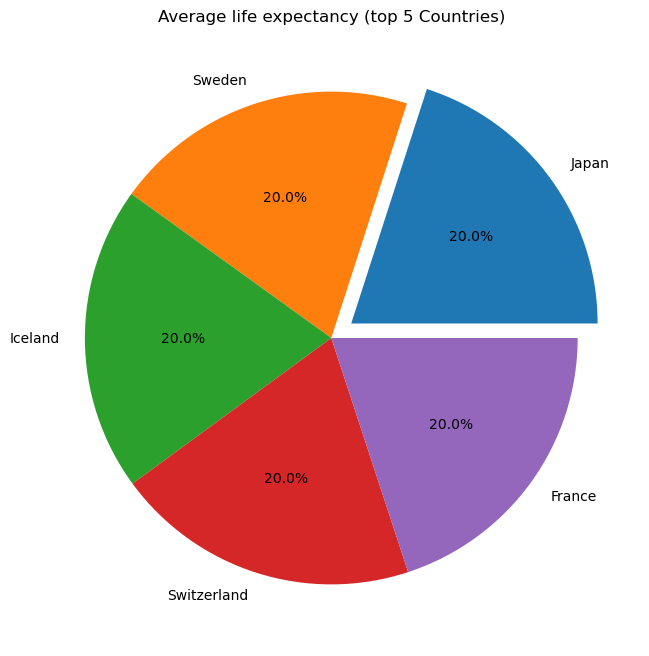

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(avg_life_expectancy['Life expectancy'], labels=avg_life_expectancy['Country'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average life expectancy (top 5 Countries)')

In [44]:
avg_infant_deaths = Suicide.groupby('Country')['Infant deaths'].mean().sort_values(ascending=False).reset_index()
avg_infant_deaths = avg_infant_deaths.head(5)
avg_infant_deaths

,Country,Infant deaths
0,Brazil,68.2500
1,Philippines,63.1000
2,Egypt,56.2500
3,South Africa,48.6875
4,Mexico,39.6250


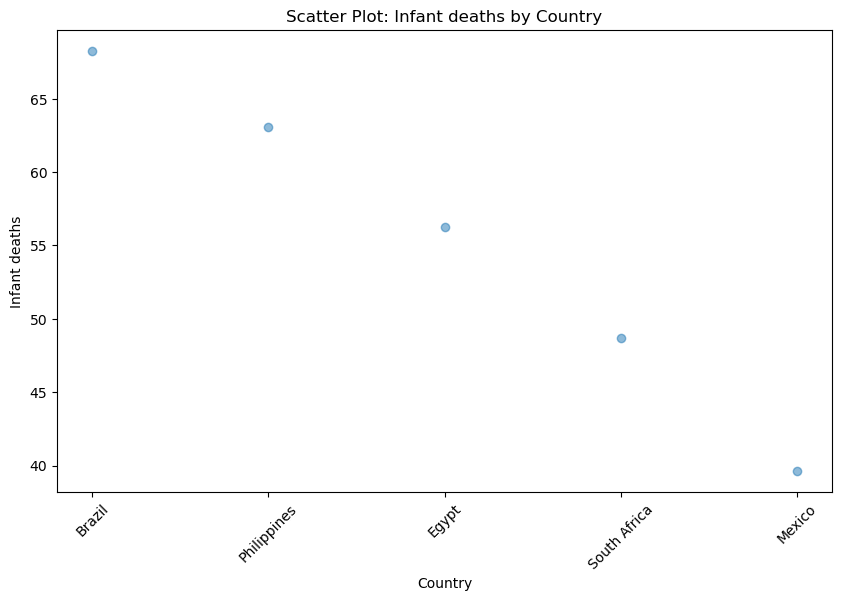

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_infant_deaths['Country'], avg_infant_deaths['Infant deaths'], alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Infant deaths')
plt.title('Scatter Plot: Infant deaths by Country')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average infant deaths (top 5 Countries)')

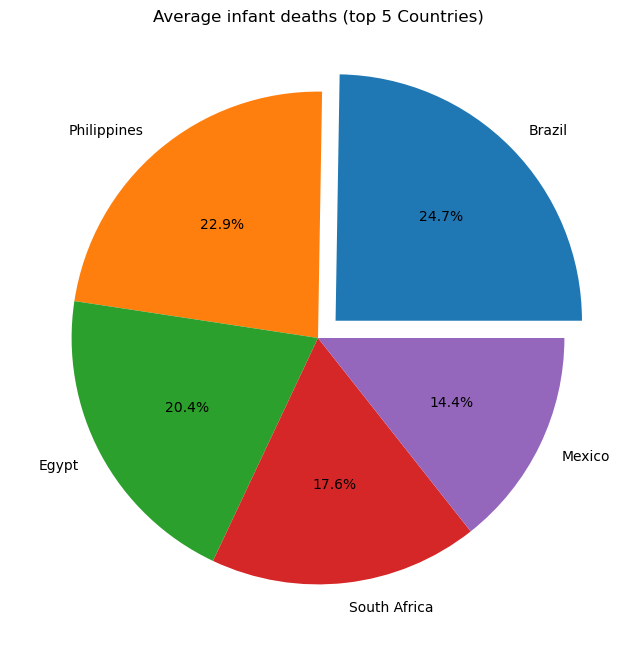

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(avg_infant_deaths['Infant deaths'], labels=avg_infant_deaths['Country'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average infant deaths (top 5 Countries)')

In [48]:
avg_infant_deaths_per_year = Suicide.groupby('Year')['Infant deaths'].mean().sort_values(ascending=False).reset_index()
avg_infant_deaths_per_year = avg_infant_deaths_per_year.head(5)
avg_infant_deaths_per_year

,Year,Infant deaths
0,2000,7.681319
1,2002,7.172043
2,2001,7.105263
3,2003,6.892473
4,2004,6.021978


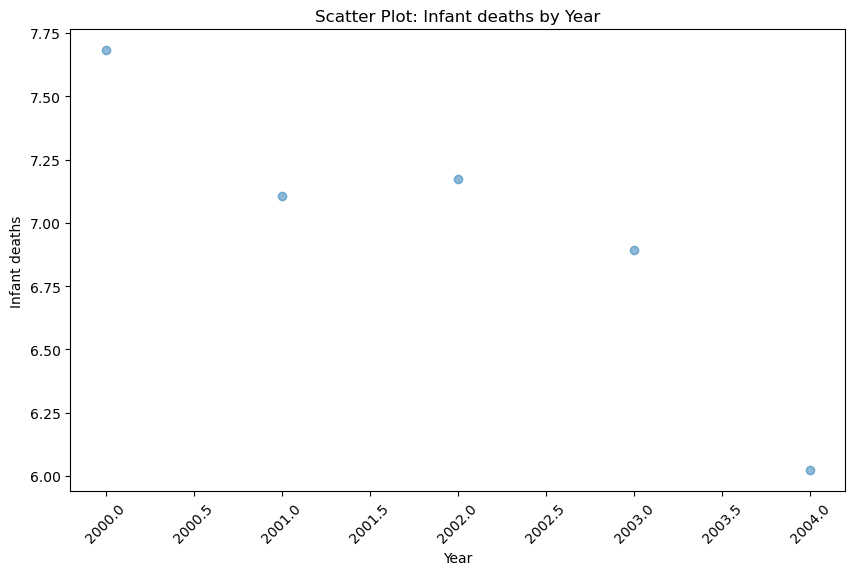

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_infant_deaths_per_year['Year'], avg_infant_deaths_per_year['Infant deaths'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Infant deaths')
plt.title('Scatter Plot: Infant deaths by Year')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average infant deaths (top 5 Years)')

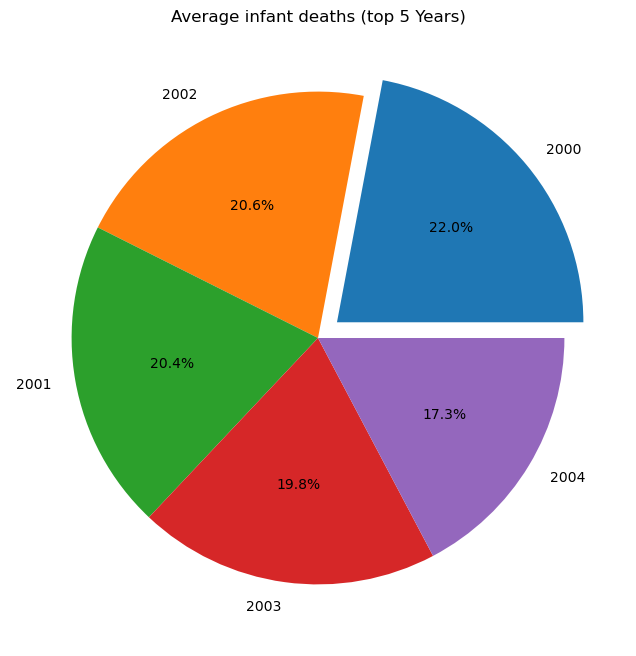

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(avg_infant_deaths_per_year['Infant deaths'], labels=avg_infant_deaths_per_year['Year'], autopct='%1.1f%%', explode=[0.1,0,0,0,0])
plt.title('Average infant deaths (top 5 Years)')